# Configuration

In [70]:
import pylab as plt
import numpy as np
import statsmodels.api as sm
import matplotlib.ticker
%matplotlib inline

In [71]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_ebfa6a6ade0a434ea529a6a0727780ac(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_a137d71b005ed4d49072796ff1024bfed73625c7','domain': {'id': '2df6373c549e49f8973fb6d22ab18c1a'},
            'password': 'dQDnU5eAQL&j_0R.'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Results - Batch Size

In [72]:
df_batch = pd.read_csv(get_object_storage_file_with_credentials_ebfa6a6ade0a434ea529a6a0727780ac('PerformanceTest', 'batch.csv'))
df_batch.set_index("Batch.Size")
df_batch.ix[:,1:]

,Source,Sink,End2End
0,3034,1426,1204
1,4518,2283,2040
2,4762,2625,2221
3,5025,3306,2499
4,5343,3439,3124
5,5664,4768,2940
6,5731,5382,3571
7,5760,5335,1587
8,5943,5260,3124
9,5957,4631,3125


(0, 7000)

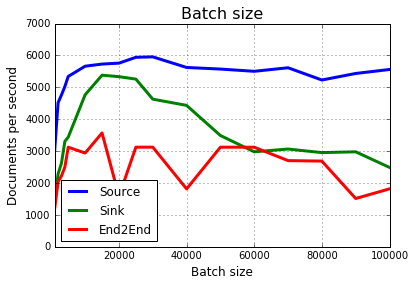

In [73]:
batch = df_batch.ix[:,1:].plot(x=df_batch.get("Batch.Size"), lw=3, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, grid=True, legend=True, style=None, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False)
batch.set_title("Batch size", fontsize=16)
batch.set_xlabel("Batch size", fontsize=12)
batch.set_ylabel("Documents per second", fontsize=12)
batch.set_xlim(1000,100000)
batch.set_ylim(0,7000)

#xlabel
#batch.set_xlim([1000,10000])
#plt.xticks(range(len(df_batch.get("Batch.Size"))), df_batch.get("Batch.Size"), rotation='vertical')

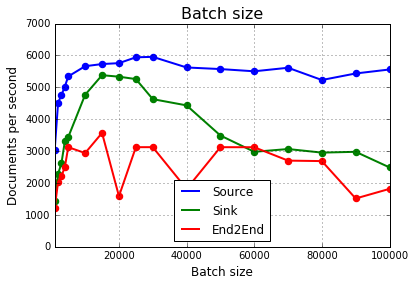

In [74]:
#Plots
plt.plot(df_batch.get("Batch.Size"), df_batch.get("Source"), color='blue', lw=2)
plt.plot(df_batch.get("Batch.Size"), df_batch.get("Sink"), color='green', lw=2)
plt.plot(df_batch.get("Batch.Size"), df_batch.get("End2End"), color='red', lw=2)

#Settings
plt.title("Batch size", fontsize=16)
plt.xlabel("Batch size", fontsize=12)
plt.ylabel("Documents per second", fontsize=12)
plt.xlim(1000,100000)
plt.ylim(0,7000)
plt.legend(loc=8)
plt.grid(True)

#ScatterPlots
plt.scatter(df_batch.get("Batch.Size"), df_batch.get("Source"), color='blue', lw=3)
plt.scatter(df_batch.get("Batch.Size"), df_batch.get("Sink"), color='green', lw=3)
plt.scatter(df_batch.get("Batch.Size"), df_batch.get("End2End"), color='red', lw=3)
plt.show()

# Results - Replication

In [75]:
df_replication = pd.read_csv(get_object_storage_file_with_credentials_ebfa6a6ade0a434ea529a6a0727780ac('PerformanceTest', 'replication.csv'))
df_replication.set_index("Replication")
df_replication.ix[:,1:]

,True,False
0,5190,4768
1,4153,3703


([<matplotlib.axis.XTick at 0x7fa72931cc18>,
 <a list of 2 Text xticklabel objects>)

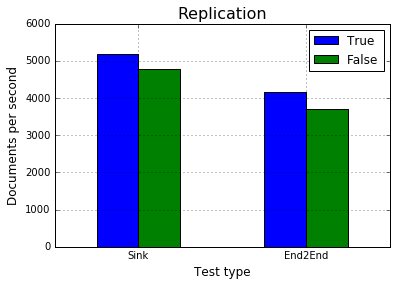

In [76]:
replication = df_replication.ix[:,1:].plot(kind='bar', legend=True, grid=True)
replication.set_title("Replication",fontsize=16)
replication.set_xlabel("Test type",fontsize=12)
replication.set_ylabel("Documents per second",fontsize=12)
#replication.legend(loc=4)

#xlabel
xlabel = ['Sink', 'End2End']
plt.xticks(range(len(xlabel)), xlabel, rotation='horizontal')

# Results - Topics

In [77]:
df_topics = pd.read_csv(get_object_storage_file_with_credentials_ebfa6a6ade0a434ea529a6a0727780ac('PerformanceTest', 'topics.csv'))
df_topics.set_index("Topics")
df_topics.ix[:,1:]

,Source,Sink,End2End
0,4135,4768,3703
1,4036,4121,3278
2,4082,4571,3529
3,4128,4365,3305
4,4137,4787,3289
5,3442,4475,3045


(0, 6000)

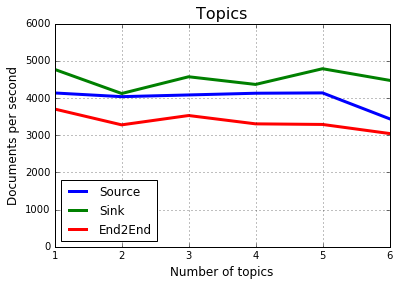

In [78]:
topics = df_topics.ix[:,1:].plot(x=df_topics.get("Topics"), lw=3, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, grid=True, legend=True, style=None, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False)
topics.set_title("Topics", fontsize=16)
topics.set_xlabel("Number of topics", fontsize=12)
topics.set_ylabel("Documents per second", fontsize=12)
topics.set_ylim([0,6000])

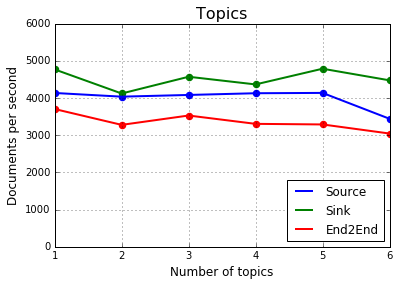

In [79]:
#Plots
plt.plot(df_topics.get("Topics"), df_topics.get("Source"), color='blue', lw=2)
plt.plot(df_topics.get("Topics"), df_topics.get("Sink"), color='green', lw=2)
plt.plot(df_topics.get("Topics"), df_topics.get("End2End"), color='red', lw=2)

#Settings
plt.title("Topics", fontsize=16)
plt.xlabel("Number of topics", fontsize=12)
plt.ylabel("Documents per second", fontsize=12)
plt.xlim(1,6)
plt.ylim(0,6000)
plt.legend(loc=4)
plt.grid(True)

#ScatterPlots
plt.scatter(df_topics.get("Topics"), df_topics.get("Source"), color='blue', lw=3)
plt.scatter(df_topics.get("Topics"), df_topics.get("Sink"), color='green', lw=3)
plt.scatter(df_topics.get("Topics"), df_topics.get("End2End"), color='red', lw=3)
plt.show()

# Results - Documents

In [80]:
df_documents = pd.read_csv(get_object_storage_file_with_credentials_ebfa6a6ade0a434ea529a6a0727780ac('PerformanceTest', 'documents.csv'))
df_documents.set_index("Documents")
df_documents.ix[:,1:]

,Source,Sink,End2End
0,2,3,1
1,21,29,2
2,178,209,25
3,1161,1219,250
4,2727,2330,1427
5,3431,3694,1536
6,2689,3581,827


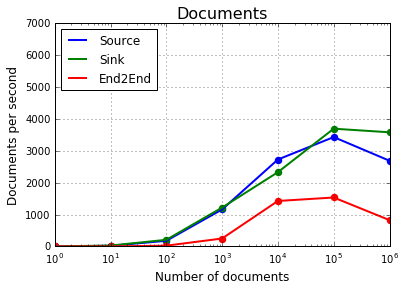

In [81]:
#Plots
plt.plot(df_documents.get("Documents"), df_documents.get("Source"), color='blue', lw=2)
plt.plot(df_documents.get("Documents"), df_documents.get("Sink"), color='green', lw=2)
plt.plot(df_documents.get("Documents"), df_documents.get("End2End"), color='red', lw=2)

#Settings
plt.title("Documents", fontsize=16)
plt.xlabel("Number of documents", fontsize=12)
plt.ylabel("Documents per second", fontsize=12)
plt.ylim(0,7000)
plt.legend(loc=2)
plt.xscale("log")
plt.xlim(0,1000000)
plt.grid(True)

#xlabel
#xlabel = [1, 10, 100, 1000, 10000, 100000, 1000000]
#plt.xticks(range(len(xlabel)), xlabel, rotation='horizontal')

#ScatterPlots
plt.scatter(df_documents.get("Documents"), df_documents.get("Source"), color='blue', lw=3)
plt.scatter(df_documents.get("Documents"), df_documents.get("Sink"), color='green', lw=3)
plt.scatter(df_documents.get("Documents"), df_documents.get("End2End"), color='red', lw=3)
plt.show()

# Results - Tasks

In [82]:
df_tasks = pd.read_csv(get_object_storage_file_with_credentials_ebfa6a6ade0a434ea529a6a0727780ac('PerformanceTest', 'tasks.csv'))
df_tasks.set_index("Tasks")
df_tasks.ix[:,1:]

,Source,Sink,End2End
0,4135,4768,3703
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0


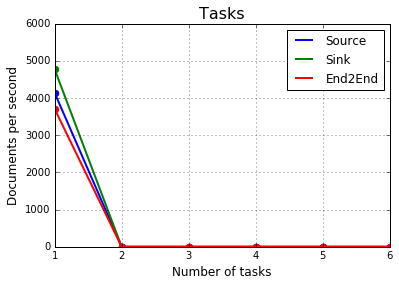

In [83]:
#Plots
plt.plot(df_tasks.get("Tasks"), df_tasks.get("Source"), color='blue', lw=2)
plt.plot(df_tasks.get("Tasks"), df_tasks.get("Sink"), color='green', lw=2)
plt.plot(df_tasks.get("Tasks"), df_tasks.get("End2End"), color='red', lw=2)

#Settings
plt.title("Tasks", fontsize=16)
plt.xlabel("Number of tasks", fontsize=12)
plt.ylabel("Documents per second", fontsize=12)
plt.xlim(1,6)
plt.ylim(0,6000)
plt.legend(loc=1)
plt.grid(True)

#ScatterPlots
plt.scatter(df_tasks.get("Tasks"), df_tasks.get("Source"), color='blue', lw=3)
plt.scatter(df_tasks.get("Tasks"), df_tasks.get("Sink"), color='green', lw=3)
plt.scatter(df_tasks.get("Tasks"), df_tasks.get("End2End"), color='red', lw=3)
plt.show()